<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Pandas</p><br>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [1]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas Series</p>

*pandas Series* one-dimensional labeled array. 


In [9]:
## pd.Series(<data-list>, <index-list>)
ser = pd.Series(data = [100, 'foo', 300, 'bar', 500], index = ['tom', 'bob', 'nancy', 'dan', 'eric'])

In [10]:
## display series
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [259]:
## display properties of object (similar to R's str()):
## dir(ser)
print(ser.__dict__)
print()
print(vars(ser))
print()
print(ser.dtype)
print()
print(type(ser))
print()
## print(ser.info()) ## only for DataFrames

## ser.info() ## DataFrame only
ser.describe()


{'_is_copy': None, '_data': SingleBlockManager
Items: Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')
ObjectBlock: 5 dtype: object, '_item_cache': {}, '_name': None, '_subtyp': 'series', '_index': Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object'), 'str': <pandas.core.strings.StringMethods object at 0x108e7f748>}

{'_is_copy': None, '_data': SingleBlockManager
Items: Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')
ObjectBlock: 5 dtype: object, '_item_cache': {}, '_name': None, '_subtyp': 'series', '_index': Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object'), 'str': <pandas.core.strings.StringMethods object at 0x108e7f748>}

object

<class 'pandas.core.series.Series'>



AttributeError: 'Series' object has no attribute 'info'

In [11]:
## same as:
print(ser)

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object


In [7]:
## get indices
ser.index

Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')

In [8]:
## get elements (parts of the series) per index: 
ser.loc[['nancy','bob']]

nancy    300
bob      foo
dtype: object

In [12]:
## get elements per location in the series:
## (identical with .iloc() ?)
ser[[4, 3, 1]]

eric    500
dan     bar
bob     foo
dtype: object

In [13]:
## get values only by location:
ser.iloc[2]

300

In [18]:
print(ser.iloc[[0, 1]]) 
print()
print(ser[[0, 1]])

tom    100
bob    foo
dtype: object

tom    100
bob    foo
dtype: object


In [19]:
'bob' in ser

True

In [20]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [21]:
ser * 2

tom         200
bob      foofoo
nancy       600
dan      barbar
eric       1000
dtype: object

In [22]:
ser[['nancy', 'eric']] ** 2

nancy     90000
eric     250000
dtype: object

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [35]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [36]:
df = pd.DataFrame(d)
print(df)

          one     two
apple   100.0   111.0
ball    200.0   222.0
cerill    NaN   333.0
clock   300.0     NaN
dancy     NaN  4444.0


In [38]:
## parts of R's str():
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, apple to dancy
Data columns (total 2 columns):
one    3 non-null float64
two    4 non-null float64
dtypes: float64(2)
memory usage: 120.0+ bytes


In [39]:
## R's summary():
df.describe()

,one,two
count,3.0,4.000000
mean,200.0,1277.500000
std,100.0,2112.944628
min,100.0,111.000000
25%,150.0,194.250000
50%,200.0,277.500000
75%,250.0,1360.750000
max,300.0,4444.000000


In [40]:
## parts of R's str():
df.dtypes

one    float64
two    float64
dtype: object

In [41]:
## similar to R's rownames()
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [42]:
## similar to R's colnames() or names():
df.columns

Index(['one', 'two'], dtype='object')

In [49]:
print(d)
df

{'one': apple    100.0
ball     200.0
clock    300.0
dtype: float64, 'two': apple      111.0
ball       222.0
cerill     333.0
dancy     4444.0
dtype: float64}


,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [43]:
## new data frame (copy) as subset as an existing one:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'])

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0


In [51]:
## new data frame (copy) as subset of an existing one, including new, non-existant columns:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two', 'five'])

,two,five
dancy,4444.0,NaN
ball,222.0,NaN
apple,111.0,NaN


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [54]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]
data

[{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [55]:
## creating new DataFrame from list of python dictionaries, without indices (=rownames):
pd.DataFrame(data)

,alex,alice,dora,ema,joe
0,1.0,NaN,NaN,NaN,2.0
1,NaN,20.0,10.0,5.0,NaN


In [56]:
## with indices (rownames):
pd.DataFrame(data, index=['orange', 'red'])

,alex,alice,dora,ema,joe
orange,1.0,NaN,NaN,NaN,2.0
red,NaN,20.0,10.0,5.0,NaN


In [57]:
## using only a subset of columns
pd.DataFrame(data, columns=['joe', 'dora','alice'])

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [58]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [59]:
## subsetting one column:
df['one']

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

In [78]:
## subsetting multiple columns by index:
df[['one', 'two']]
#df.loc[:, ['one', 'two']]

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [80]:
## subsetting multiple columns by numerical position:
df.iloc[:,[0,1]]
#df.iloc[1]

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [81]:
df['three'] = df['one'] * df['two']
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,4444.0,NaN


In [82]:
df['flag'] = df['one'] > 250
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [83]:
## get a column and remove it from DataFrame:
three = df.pop('three')

In [84]:
three

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [85]:
df

,one,two,flag
apple,100.0,111.0,False
ball,200.0,222.0,False
cerill,NaN,333.0,False
clock,300.0,NaN,True
dancy,NaN,4444.0,False


In [86]:
## remove column:
del df['two']

In [87]:
df

,one,flag
apple,100.0,False
ball,200.0,False
cerill,NaN,False
clock,300.0,True
dancy,NaN,False


In [88]:
df.insert(2, 'copy_of_one', df['one'])
df

,one,flag,copy_of_one
apple,100.0,False,100.0
ball,200.0,False,200.0
cerill,NaN,False,NaN
clock,300.0,True,300.0
dancy,NaN,False,NaN


In [89]:
df['one_upper_half'] = df['one'][:2]
df

,one,flag,copy_of_one,one_upper_half
apple,100.0,False,100.0,100.0
ball,200.0,False,200.0,200.0
cerill,NaN,False,NaN,NaN
clock,300.0,True,300.0,NaN
dancy,NaN,False,NaN,NaN


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

Please note that **you will need to download the dataset**. Although the video for this notebook says that the data is in your folder, the folder turned out to be too large to fit on the edX platform due to size constraints.

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Once the download completes, please make sure the data files are in a directory called *movielens* in your *Week-3-pandas* folder. 

Let us look at the files in this dataset using the UNIX command ls.


In [97]:
import os
import urllib3
import shutil

url = 'http://files.grouplens.org/datasets/movielens/ml-20m.zip'
c = urllib3.PoolManager()
filename = 'movielens/ml-20m.zip'

## download file using urllib3:

#with c.request('GET', url, preload_content = False) as resp, open(filename, 'wb') as out_file:
#    shutil.copyfileobj(resp, out_file)
#
#resp.release_conn() 

#os.getcwd()

In [99]:
# Note: Adjust the name of the folder to match your local directory

!ls ./movielens

Icon?              ml-20m             ml-20m-README.html ml-20m.zip


In [100]:
!cat ./movielens/movies.csv | wc -l

   27279


In [101]:
!head -5 ./movielens/ratings.csv

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [102]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [103]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [105]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [106]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [114]:
#Extract 0th row: notice that it is infact a Series

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [115]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [116]:
## get names (names of row-Series, i.e., column names in this case)
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [117]:
row_0['userId']

18

In [118]:
'rating' in row_0

False

In [119]:
## index (row names) of series:
row_0.name

0

In [120]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [121]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [122]:
## get rownames:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [123]:
## get column names:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [124]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
2000,910,68554,conspiracy theory


<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [125]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [129]:
## suppress scientific formatting globally:
#pd.options.display.float_format = '{:.4f}'.format

## only works for suppressing scientific formatting for up to 2 decimals:
ratings['rating'].describe().round(decimals = 2)

count    20000263.00
mean            3.53
std             1.05
min             0.50
25%             3.00
50%             3.50
75%             4.00
max             5.00
Name: rating, dtype: float64

In [131]:
ratings.describe().round(2)

,userId,movieId,rating
count,20000263.00,20000263.00,20000263.00
mean,69045.87,9041.57,3.53
std,40038.63,19789.48,1.05
min,1.00,1.00,0.50
25%,34395.00,902.00,3.00
50%,69141.00,2167.00,3.50
75%,103637.00,4770.00,4.00
max,138493.00,131262.00,5.00


In [132]:
ratings['rating'].mean()

3.5255285642993797

In [133]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [134]:
ratings['rating'].min()

0.5

In [135]:
ratings['rating'].max()

5.0

In [136]:
ratings['rating'].std()

1.051988919275684

In [144]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [146]:
type(_)
##vars(_)


pandas.core.series.Series

In [147]:
## correlation matrix
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [148]:
type(_)

pandas.core.frame.DataFrame

In [151]:
## create filter (and check it):
filter_1 = ratings['rating'] > 5
print(filter_1.head())
filter_1.any()

0    False
1    False
2    False
3    False
4    False
Name: rating, dtype: bool


False

In [150]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [152]:
movies.shape

(27278, 3)

In [153]:
#is any row NULL ?
## rather: are there NULLs in any row?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

Thats nice ! No NULL values !

In [154]:
ratings.shape

(20000263, 3)

In [155]:
#is any row NULL ?
## rather: are there NULLs in any row?

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

Thats nice ! No NULL values !

In [156]:
tags.shape

(465564, 3)

In [157]:
#is any row NULL ?
## rather: are there NULLs in any row?

tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [166]:
## find rows with missing values:
tags[tags['tag'].isnull()].head()

,userId,movieId,tag
373276,116460,123,NaN
373277,116460,346,NaN
373281,116460,1184,NaN
373288,116460,1785,NaN
373289,116460,2194,NaN


We have some tags which are NULL.

In [ ]:
## Why the fuck are they NaN's, and not None?

In [167]:
tags = tags.dropna()

In [168]:
#Check again: is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [169]:
tags.shape

(465548, 3)

Thats nice ! No NULL values ! Notice the number of lines have reduced.

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ada5860>]],
      dtype=object)

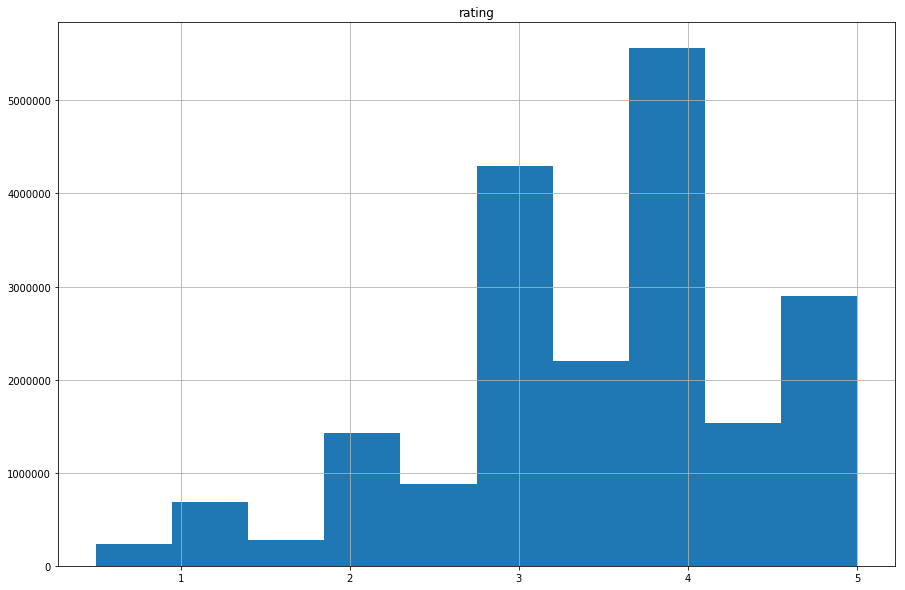

In [170]:
%matplotlib inline

ratings.hist(column = 'rating', figsize = (15,10))

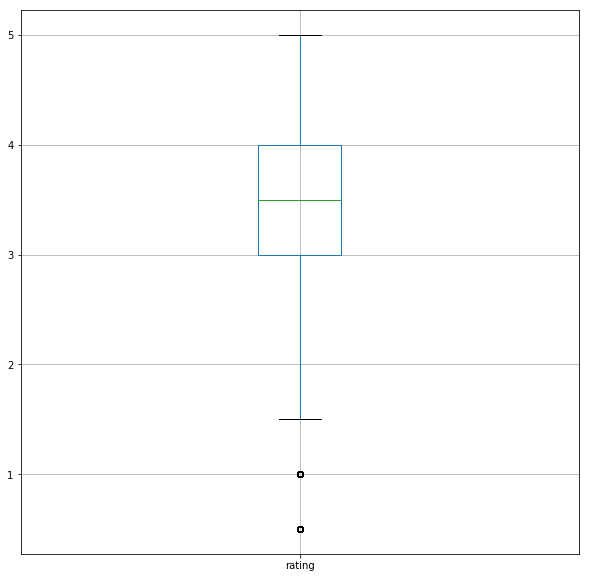

In [173]:
ratings.boxplot(column='rating', figsize=(10,10))

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [174]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [175]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [176]:
## last 10 lines of the ratings DataFrame:
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [180]:
## frequency table, similar to R's table()
tag_counts = tags['tag'].value_counts()
pd.concat([tag_counts[:5], tag_counts[-5:]])

sci-fi                                                        3384
based on a book                                               3281
atmospheric                                                   2917
comedy                                                        2779
action                                                        2657
the train                                                        1
Zoe Kravitz                                                      1
chris evan's butt                                                1
cinematographically examines issues in contemporary cultre       1
Nai-Hoi Yau                                                      1
Name: tag, dtype: int64

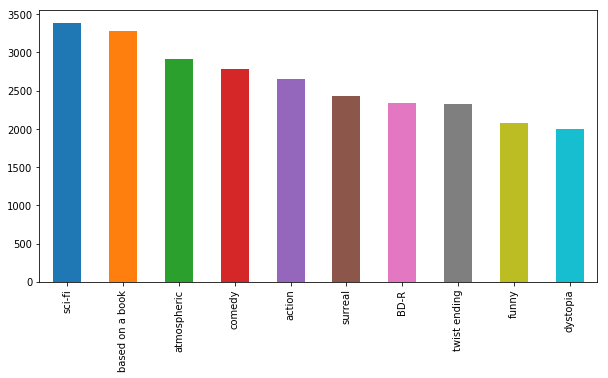

In [183]:
tag_counts[:10].plot(kind='bar', figsize=(10,5))

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [186]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][30:35]

,userId,movieId,rating
68,1,2021,4.0
69,1,2100,4.0
70,1,2118,4.0
71,1,2138,4.0
72,1,2140,4.0


In [188]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:10]

,movieId,title,genres
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


In [190]:
movies[is_animation].head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children


<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [191]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [198]:
## group by / aggregate, resulting in a DataFrame:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating_sd = ratings[['movieId','rating']].groupby('movieId').std()
pd.concat([average_rating, average_rating_sd], axis = 1, keys = ['rating_mean', 'rating_sd']).head()

,rating_mean,rating_sd
,rating,rating
movieId,,
1,3.921240,0.889012
2,3.211977,0.951150
3,3.151040,1.006642
4,2.861393,1.095702
5,3.064592,0.982140


In [201]:
## just count the number of times a move has been rates (number of ratings):
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [202]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [203]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [204]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [205]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Combine aggreagation, merging, and filters to get useful analytics
</p>

In [208]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']  ## is just the average of userid, as this is an integer... stupid.
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [215]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [220]:
is_highly_rated = box_office['rating'] >= 4.0

box_office.sort_values(by = 'rating', ascending = False).head(5)
    

,movieId,title,genres,rating
19152,95517,"Barchester Chronicles, The (1982)",Drama,5.0
21842,105846,Only Daughter (2013),Drama,5.0
17703,89133,Boys (Drenge) (1977),Drama,5.0
21656,105187,Linotype: The Film (2012),Documentary,5.0
21658,105191,Rocaterrania (2009),Documentary|Fantasy,5.0


In [225]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy].sort_values(by = 'rating').tail()

,movieId,title,genres,rating
26347,129243,Afstiros katallilo (2008),Comedy,5.0
16952,86055,"Foster Brothers, The (Süt kardesler) (1976)",Comedy,5.0
23843,113947,"Lady of Chance, A (1928)",Comedy|Drama|Romance,5.0
22818,109571,Into the Middle of Nowhere (2010),Adventure|Children|Comedy|Documentary|Drama,5.0
26416,129516,Poison (1951),Comedy,5.0


In [226]:
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,rating
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0


<h1 style="font-size:2em;color:#2467C0">Vectorized String Operations</h1>


In [227]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Split 'genres' into multiple columns

<br> </p>

In [228]:
## why do I have to put the '.str' in the code in the cell below? [[?]]
type(movies['genres'].str)

pandas.core.strings.StringMethods

In [229]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [230]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Add a new column for comedy genre flag

<br> </p>

In [231]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [232]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [290]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [291]:
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


In [280]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 4 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
year       27261 non-null object
dtypes: int64(1), object(3)
memory usage: 852.5+ KB


In [307]:
## get help:
movies.astype?

In [311]:
print(type(movies['year']))
#movies['year'] = 
#pd.to_numeric(movies['year'])
#movies['year'] = movies['year'].astype(dtype = 'float64') ## only works if all values can be converted

movies['year'] = pd.to_numeric(movies['year'], errors = 'coerce')

<class 'pandas.core.series.Series'>


In [312]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 4 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
year       27255 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 852.5+ KB


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


In [235]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')

In [236]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [237]:
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [239]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')
tags.head(3)

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18
2,65,353,dark hero,1368150079,2013-05-10 01:41:19


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Data Type datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the hardware

</p>

In [245]:

tags['parsed_time'].dtype

dtype('<M8[ns]')

In [246]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [249]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape
#selected_rows

((465564, 5), (12130, 5))

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [250]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19
333922,100371,47,morgan freeman,1135429412,2005-12-24 13:03:32
333921,100371,47,brad pitt,1135429412,2005-12-24 13:03:32
333936,100371,4011,brad pitt,1135429431,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,1135429431,2005-12-24 13:03:51
333920,100371,32,bruce willis,1135429442,2005-12-24 13:04:02


<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>
## Are Movie ratings related to the year of launch?

In [253]:
## if as_index is True, the movieId column would (only) be returned as index (i.e, row name).
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [313]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995.0,3.064592


In [314]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26744 entries, 0 to 26743
Data columns (total 5 columns):
movieId    26744 non-null int64
title      26744 non-null object
genres     26744 non-null object
year       26721 non-null float64
rating     26744 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [315]:
## need to convert year from object to integer first!!! with pd.to_numeric(x, errors = 'coerce')

In [317]:
joined[['year', 'rating']].corr()

,year,rating
year,1.000000,-0.051525
rating,-0.051525,1.000000


In [318]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,1891.0,3.000000
1,1893.0,3.375000
2,1894.0,3.071429
3,1895.0,3.125000
4,1896.0,3.183036
5,1898.0,3.850000
6,1899.0,3.625000
7,1900.0,3.166667
8,1901.0,5.000000
9,1902.0,3.738189


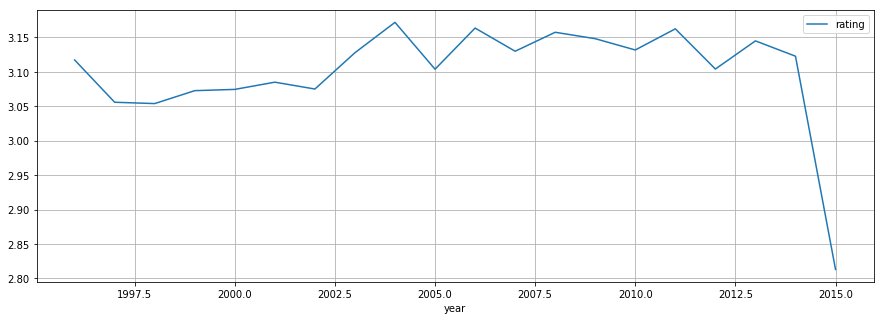

In [319]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,5), grid=True)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Do some years look better for the boxoffice movies than others? <br><br>

Does any data point seem like an outlier in some sense?

</p>

## Additional Code from Quizzes

In [4]:
import pandas as pd
ser = pd.Series([100, 200, 300, 400, 500], index = ['tom', 'bob', 'nancy', 'dan', 'eric'])
ser[[0, 1]]
ser[['tom', 'bob']]
ser.iloc[[0, 1]]

tom    100
bob    200
dtype: int64

In [5]:
ser[['tom', 'bob']]

tom    100
bob    200
dtype: int64

In [8]:
dat = pd.DataFrame([[100, 200], [300, 400]], columns = ['a', 'b'])

In [13]:
#dat.loc['c']
dat.describe()

,a,b
count,2.000000,2.000000
mean,200.000000,300.000000
std,141.421356,141.421356
min,100.000000,200.000000
25%,150.000000,250.000000
50%,200.000000,300.000000
75%,250.000000,350.000000
max,300.000000,400.000000


In [14]:
dat.isnull().any()

a    False
b    False
dtype: bool